# Microéconomie 5
## TD7 : Risque et incertain (II)

### Exercice 1 : Choix optimal

Il y a deux états de la nature, 1 et 2, se produisant avec probabilité $\pi_1 = \pi_2 = \frac{1}{2}$. Les dotations initiales en biens contingents sont $\overline c^A = (10, 2)$ et $\overline c^B = (10, 6)$. Les agents ont les préférences

\begin{aligned}
    v^A(c) &= \ln(c) \\
    v^B(c) &= c.
\end{aligned}

In [23]:
pi1 <- 1/2                                 # probabilité de l'état 1
pi2 <- 1/2                                 # probabilité de l'état 2
cA <- c(10, 2)                             # dotation initiale de A
cB <- c(10, 6)                             # dotation initiale de B
c1 <- cA[1] + cB[1]                        # dotation totale dans l'état 1
c2 <- cA[2] + cB[2]                        # dotation totale dans l'état 2
vA <- function(c) log(c)                   # fonction d'utilité de A
vB <- function(c) c                        # fonction d'utilité de B

On représente d'abord les **dotations initiales de $A$** dans le plan des biens contingents $(c_1, c_2)$, ainsi que la **droite de certitude** (en pointillés) et la **droite des loteries de même espérance que $\overline c^A$** (en trait plein).

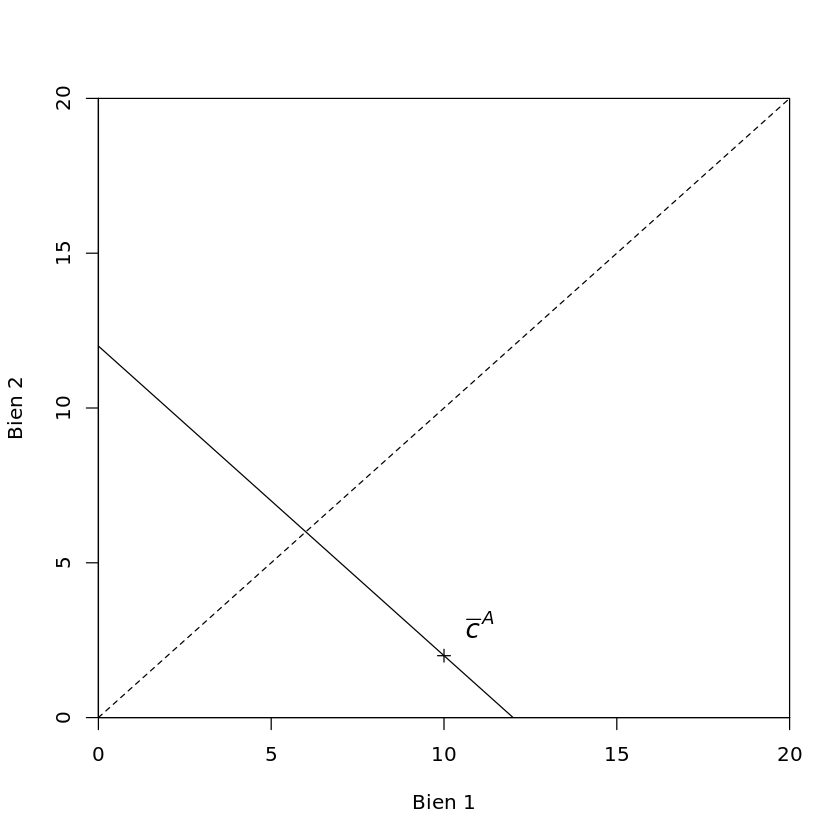

In [24]:
c <- seq(0, c1, length=1000)

plot(x = c, y = c, type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs="i", yaxs="i")
points(cA[1], cA[2], pch=3)                                                   # dotation initiale de A
    text(cA[1]+.05*max(c), cA[2]+.05*max(c), labels = expression(italic(bar("c")^A)), cex = 1.3, font = 3)
abline(a=0, b=1, lty=2)                                                       # droite de certitude
abline(a=(pi1*cA[1] + pi2*cA[2])/pi2, b=-pi1/pi2)                             # loteries équitables

Pour trouver le **panier optimal** de $A$ en fonctions des prix $p = (p_1, p_2)$ des biens contingents 1 et 2, on résout le programme

\begin{equation}
    \max_{c^A} \; \pi_1 v^A(c_1^A) + \pi_2 v^A(c_2^A)
    \qquad \text{s.c.} \;
    p \cdot c^A \leq p \cdot \overline c^A.
\end{equation}

Le lagrangien associé est ici
\begin{equation}
    \mathcal L(c^A, \mu) = \frac{1}{2} \ln(c_1^A) + \frac{1}{2} \ln(c_2^A) + \mu(p \cdot c^A - p \cdot x^A)
\end{equation}

et les conditions du premier ordre
\begin{aligned}
    &\frac{1}{2 c_1^A} - \mu p_1 = 0 \\
    &\frac{1}{2 c_2^A} - \mu p_2 = 0 \\
    &p \cdot c^A = p \cdot \overline c^A.
\end{aligned}

Des deux premières conditions on déduit
\begin{equation}
    \underbrace{\frac{c_2^A}{c_1^A}}_{= \mathsf{TMS}^A} = \frac{p_1}{p_2}
\end{equation}

puis en prenant en compte la contrainte de budget (troisième équation) on obtient

\begin{equation}
    \boxed{ c_1^A(p) = \frac{p_1 \overline c_1^A + p_2 \overline c_2^A}{2 p_1} }
    \quad \text{ et } \quad
    \boxed{ c_2^A(p) = \frac{p_1 \overline c_1^A + p_2 \overline c_2^A}{2 p_2} }
\end{equation}

c'est-à-dire que $A$ répartit sa richesse initiale de façon égale entre les biens contingents 1 et 2.

Si $\frac{p_1}{p_2} < \frac{\pi_1}{\pi_2} = 1$ alors on constate que $c_2^A(p) < \frac{\overline c_1^A + \overline c_2^A}{2} < c_1^A(p)$, c'est-à-dire que $A$ ne s'assure pas complètement.

Par exemple, quand $p_1 = \frac{1}{2}$ et $p_2 = 1$, alors $c_1^A = 7$ et $c_2^A = \frac{7}{2}$.

Représentons cette situation sur un graphe : en pointillés la droite de budget de $A$ sous les prix $p_1 = \frac{1}{2}$ et $p_2 = 1$, et en bleu la courbe d'indifférence de $A$ qui est tangente à cette droite de budget.

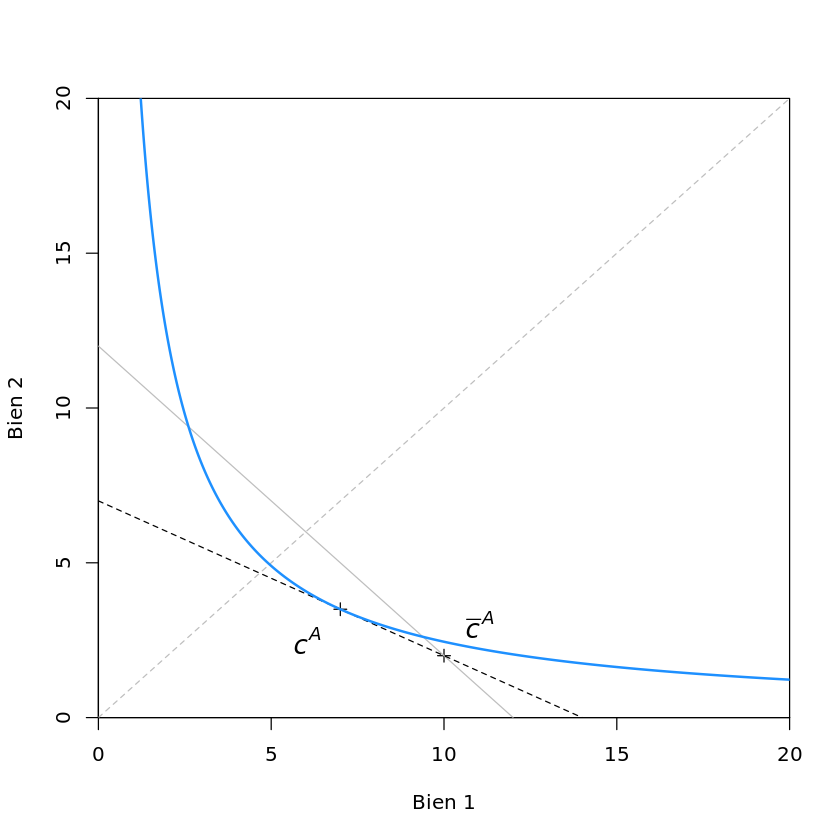

In [25]:
optA <- function(p) c(crossprod(p, cA)/(2*p[1]), crossprod(p, cA)/(2*p[2]))   # allocations optimales
p <- c(1/2, 1)

plot(x = c, y = c, type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs="i", yaxs="i")
points(cA[1], cA[2], pch=3)                                                   # dotation initiale de A
    text(cA[1]+.05*max(c), cA[2]+.05*max(c), labels = expression(italic(bar("c")^A)), cex = 1.3, font = 3)
abline(a=0, b=1, lty=2, col="grey")                                           # droite de certitude
abline(a=(pi1*cA[1] + pi2*cA[2])/pi2, b=-pi1/pi2, col="grey")                 # loteries équitables

abline(a=crossprod(p, cA)/p[2], b=-p[1]/p[2], lty=2)                          # droite de budget
points(optA(p)[1], optA(p)[2], pch=3)                                         # panier optimal de A
    text(optA(p)[1]-.05*max(c), optA(p)[2]-.05*max(c), labels = expression(italic("c"^A)), cex = 1.3, font = 3)
lines(c, optA(p)[1]*optA(p)[2]/c, col="dodgerblue", lwd=2)                    # courbe d'indifférence de A

$A$ va s'assurer totalement quand $\frac{p_1}{p_2} = \frac{\pi_1}{\pi_2} = 1$, i.e. quand $p_1 = p_2$ : dans ce cas $A$ choisit le panier $c_1^A = c_2^A = 6$.

Étudions maintenant le cas de $B$, qui est neutre au risque.

Si $\frac{p_1}{p_2} < \frac{\pi_1}{\pi_2} = 1$, alors pour $B$ l'utilité espérée marginale d'un euro dépensé en bien 1, $\frac{\pi_1}{p_1}$, est toujours supérieure à celle d'un euro dépensé en bien 2, $\frac{\pi_2}{p_2}$. $B$ va donc utiliser toutes ses ressources pour acquérir du bien 1.

Représentons cette situation sur un graphe : en pointillés la droite de budget de $B$ sous les prix $p_1 = \frac{1}{2}$ et $p_2 = 1$, et en bleu la courbe d'indifférence de $B$ passant par son panier optimal (c'est la droite d'espérance constante la plus haute que $B$ peut atteindre avec son budget).

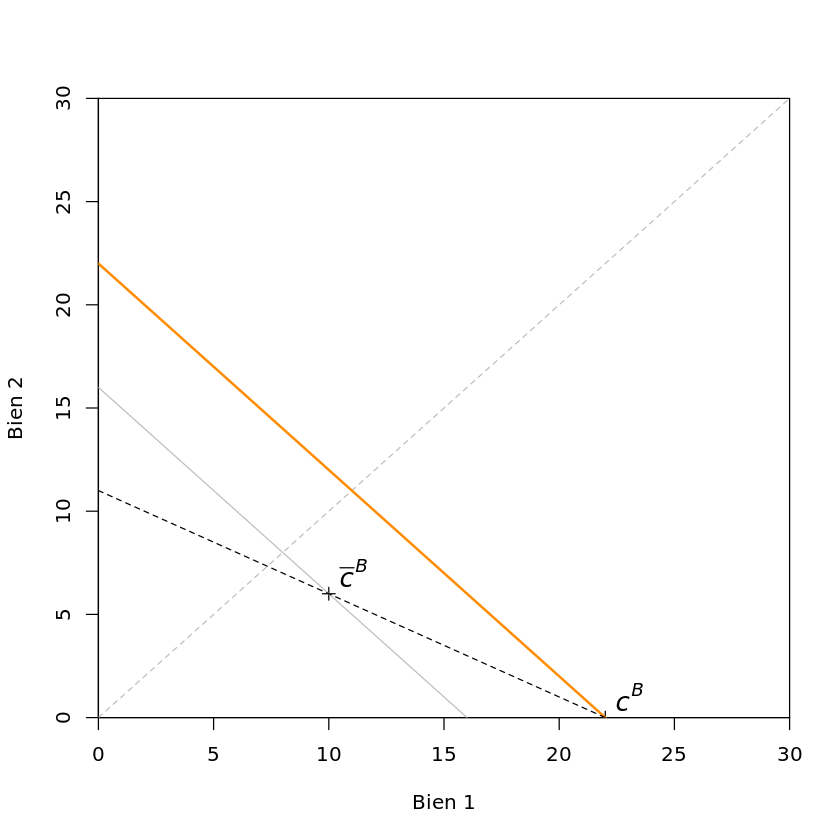

In [26]:
plot(x = 1.5*c, y = 1.5*c, type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs="i", yaxs="i")
points(cB[1], cB[2], pch=3)                                                   # dotation initiale de A
    text(cB[1]+.05*max(c), cB[2]+.05*max(c), labels = expression(italic(bar("c")^B)), cex = 1.3, font = 3)
abline(a=0, b=1, lty=2, col="grey")                                           # droite de certitude
abline(a=(pi1*cB[1] + pi2*cB[2])/pi2, b=-pi1/pi2, col="grey")                 # loteries équitables

points(crossprod(p, cB)/p[1], 0, pch=3)                                       # panier optimal de B
    text(crossprod(p, cB)/p[1]+.05*max(c), 0+.05*max(c), labels = expression(italic("c"^B)), cex = 1.3, font = 3)
abline(a=crossprod(p, cB)/pi2, b=-pi1/pi2, col="darkorange", lwd=2)           # courbe d'indifférence de B
abline(a=crossprod(p, cB)/p[2], b=-p[1]/p[2], lty=2)                          # droite de budget

Si au contraire $\frac{p_1}{p_2} = \frac{\pi_1}{\pi_2} = 1$, alors l'utilité marginale apportée par un euro dépensé en bien 1 ou 2 est la même. Dans ce cas, $B$ est indifférente entre tous les paniers de sa droite de budget, c'est-à-dire entre tous les $c^B$ tels que $p \cdot c^B = p \cdot \overline c^B$. N'importe lequel de ces paniers est donc optimal.

Enfin, quel est l'**équilibre concurrentiel** entre $A$ et $B$ avec ces allocations ?

Rappelons-nous qu'un équilibre concurrentiel doit être composé d'un système de prix $p = (p_1, p_2)$ (déterminés à une constante multiplicative près), et d'allocations $c^A = (c_1^A, c_2^A)$ et $c^B = (c_1^B, c_2^B)$, qui doivent vérifier :

1. Pour tout $k = A, B$, $c^k$ est un panier optimal pour l'agent $k$ sous les prix $p$, c'est-à-dire que $c^k$ est solution du programme

\begin{equation}
    \max_{c^k} \; \pi_1 v^k(c_1^k) + \pi_2 v^A(c_2^k)
    \qquad \text{s.c.} \;
    p \cdot c^k \leq p \cdot \overline c^k.
\end{equation}

2. Les marchés des biens contingents 1 et 2 doivent être équilibrés : pour tout $i = 1, 2$,

\begin{equation}
    c_i^A + c_i^B = \overline c_i^A + \overline c_i^B.
\end{equation}


Avec l'hypothèse que la solution est intérieure, le premier point implique l'égalité

\begin{equation}
    \mathsf{TMS}^A = \mathsf{TMS}^B = \frac{p_1}{p_2} \iff \frac{\pi_1 c_2^A}{\pi_2 c_1^A} = \frac{\pi_1}{\pi_2} = \frac{p_1}{p_2}
\end{equation}

d'où l'on déduit, puisqu'ici $\pi_1 = \pi_2$,

\begin{equation}
    c_1^A = c_2^A
    \qquad \text{et} \qquad
    \boxed{ p_1 = p_2 }.
\end{equation}

Avec les contraintes de budget de $A$ on obtient

\begin{equation}
    \boxed{ c_1^A = c_2^A = \frac{\overline c_1^A + \overline c_2^A}{2} } \overset{\text{A.N.}}{=} 6
\end{equation}

puis avec les conditions de ressources de l'économie

\begin{equation}
    \boxed{ c_1^B = \overline c_1^A + \overline c_1^B - c_1^A } \overset{\text{A.N.}}{=} 14
    \qquad \text{et} \qquad
    \boxed{ c_2^B = \overline c_2^A + \overline c_2^B - c_2^A } \overset{\text{A.N.}}{=} 2.
\end{equation}


Représentons finalement cet équilibre dans une boîte d'Edgeworth.

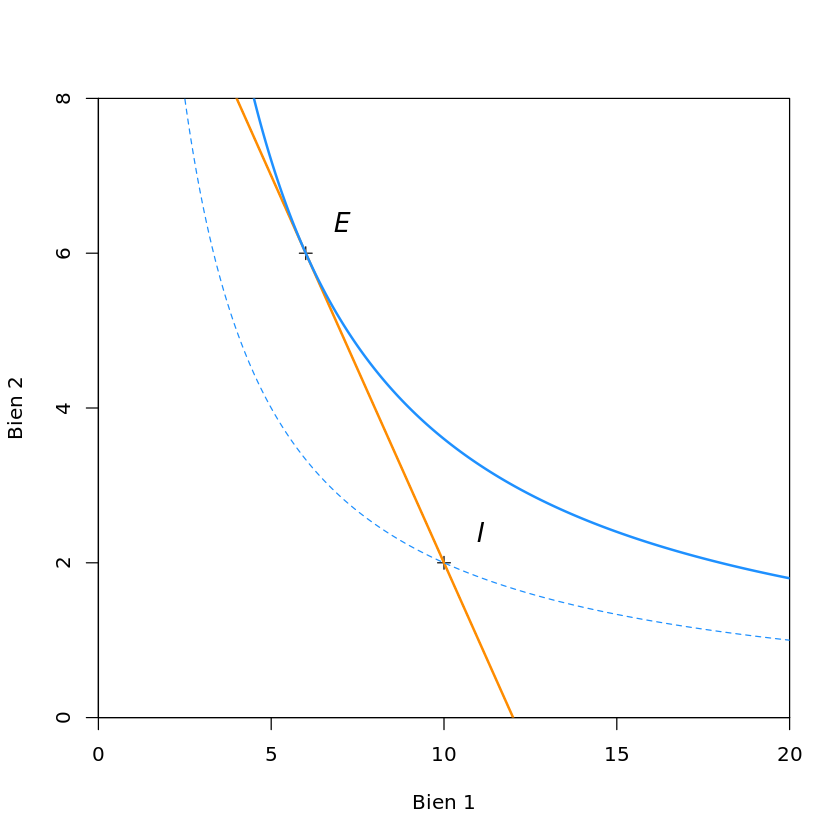

In [28]:
I <- cA
E <- c((cA[1]+cA[2])/2, (cA[1]+cA[2])/2)
p <- c(1, 1)

plot(x = c, y = c, type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs="i", yaxs="i", xlim=c(0, c1), ylim=c(0,c2))
points(I[1], I[2], pch=3)                                                     # dotation initiale de A
    text(I[1]+.05*c1, I[2]+.05*c2, labels = "I", cex = 1.3, font = 3)
abline(a=(pi1*cA[1] + pi2*cA[2])/pi2, b=-pi1/pi2, lty = 2)                    # loteries équitables
points(E[1], E[2], pch=3)                                                     # équilibre concurrentiel
    text(E[1]+.05*c1, E[2]+.05*c2, labels = "E", cex = 1.3, font = 3)

abline(a=(pi1*cA[1] + pi2*cA[2])/pi2, b=-pi1/pi2, col="darkorange", lwd = 2)  # courbe d'indifférence de B
lines(c, E[1]*E[2]/c, col="dodgerblue", lwd=2)                                # courbe d'indifférence de A
lines(c, I[1]*I[2]/c, col="dodgerblue", lwd=1, lty=2)                         # courbe d'indifférence de A

La droite de budget d'équilibre est confondue avec la courbe d'indifférence de $B$ (en orange). J'ai aussi représenté deux courbes d'indifférence pour $A$ : celle qui passe par l'allocation initiale $I$ et celle qui passe par l'allocation d'équilibre $E$.

On remarque que $A$ augmente son utilité par l'échange concurrentiel (il passe de la courbe d'indifférence en pointillés à celle en trait plein, plus haute) tandis que $B$ reste au même niveau d'utilité (elle reste sur sa courbe d'indifférence orange). 